In [1]:
%matplotlib inline
from __future__ import division
import pandas
import matplotlib.pyplot as plt
import numpy
import seaborn
seaborn.set_context({"figure.figsize": (12, 6)})

/projects/standage/adj_iiloci/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('Scer', 'FF', '13 / 79', '0.1646')
('Scer', 'RR', '19 / 79', '0.2405')
('Scer', 'FR', '5 / 79', '0.0633')
('Scer', 'RF', '42 / 79', '0.5316')


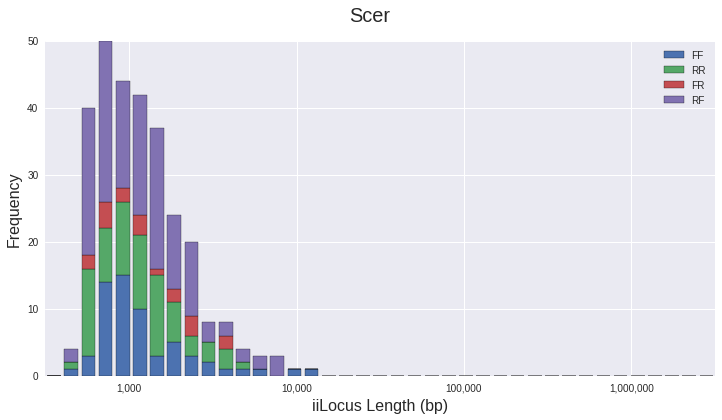

('Cele', 'FF', '302 / 1087', '0.2778')
('Cele', 'RR', '313 / 1087', '0.2879')
('Cele', 'FR', '200 / 1087', '0.1840')
('Cele', 'RF', '272 / 1087', '0.2502')


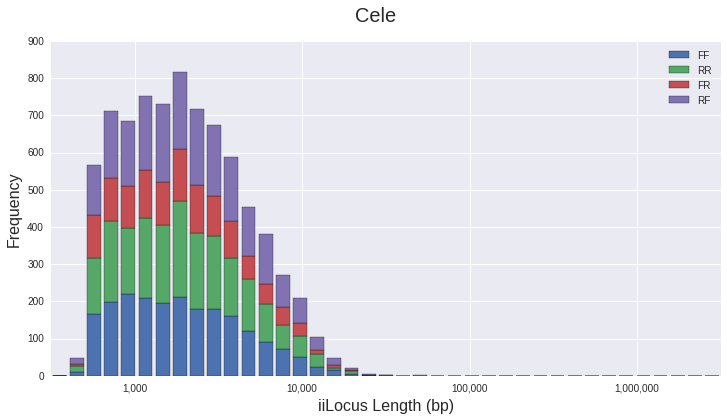

('Crei', 'FF', '131 / 599', '0.2187')
('Crei', 'RR', '137 / 599', '0.2287')
('Crei', 'FR', '212 / 599', '0.3539')
('Crei', 'RF', '119 / 599', '0.1987')


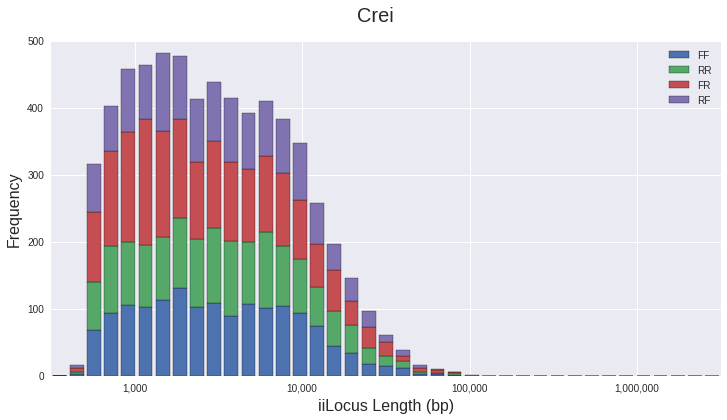

('Mtru', 'FF', '574 / 2096', '0.2739')
('Mtru', 'RR', '529 / 2096', '0.2524')
('Mtru', 'FR', '561 / 2096', '0.2677')
('Mtru', 'RF', '432 / 2096', '0.2061')


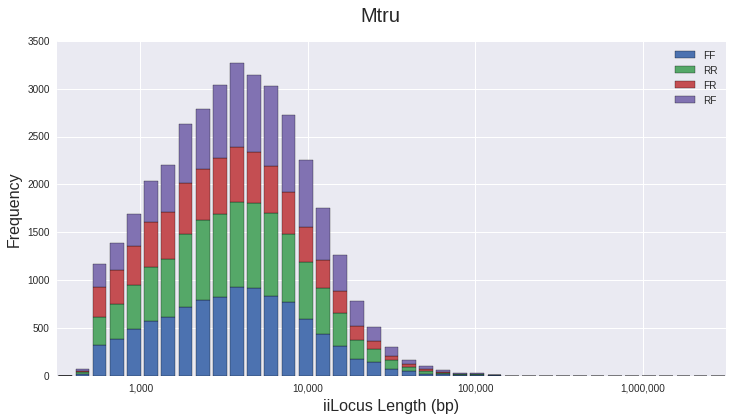

('Agam', 'FF', '107 / 385', '0.2779')
('Agam', 'RR', '96 / 385', '0.2494')
('Agam', 'FR', '100 / 385', '0.2597')
('Agam', 'RF', '82 / 385', '0.2130')


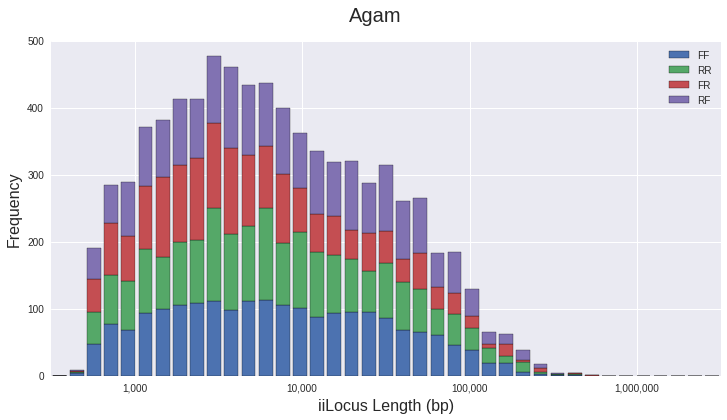

('Dmel', 'FF', '73 / 248', '0.2944')
('Dmel', 'RR', '58 / 248', '0.2339')
('Dmel', 'FR', '48 / 248', '0.1935')
('Dmel', 'RF', '69 / 248', '0.2782')


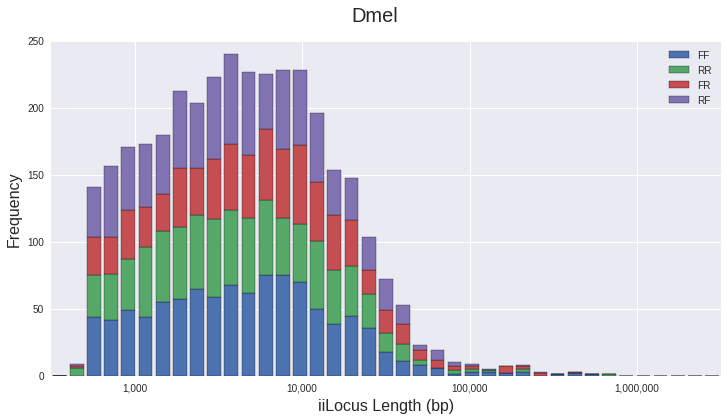

('Xtro', 'FF', '60 / 323', '0.1858')
('Xtro', 'RR', '92 / 323', '0.2848')
('Xtro', 'FR', '130 / 323', '0.4025')
('Xtro', 'RF', '41 / 323', '0.1269')


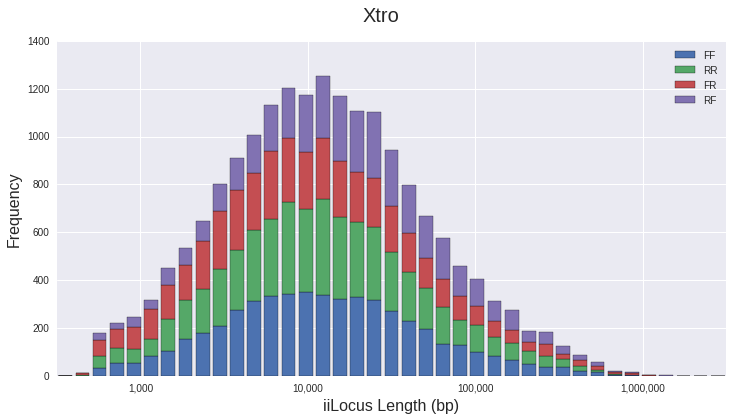

('Drer', 'FF', '259 / 863', '0.3001')
('Drer', 'RR', '271 / 863', '0.3140')
('Drer', 'FR', '169 / 863', '0.1958')
('Drer', 'RF', '164 / 863', '0.1900')


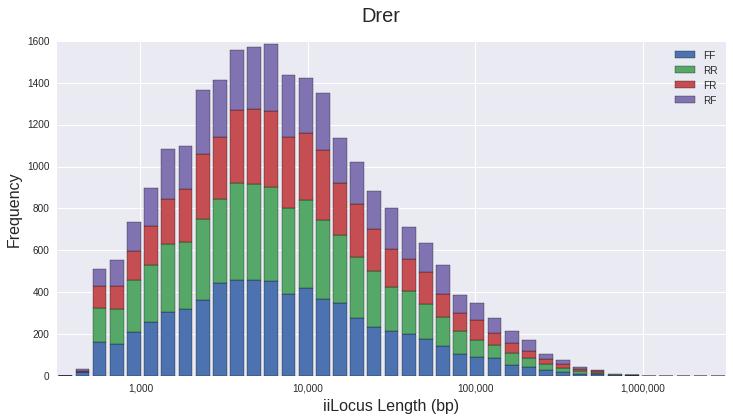

('Mmus', 'FF', '91 / 367', '0.2480')
('Mmus', 'RR', '104 / 367', '0.2834')
('Mmus', 'FR', '118 / 367', '0.3215')
('Mmus', 'RF', '54 / 367', '0.1471')


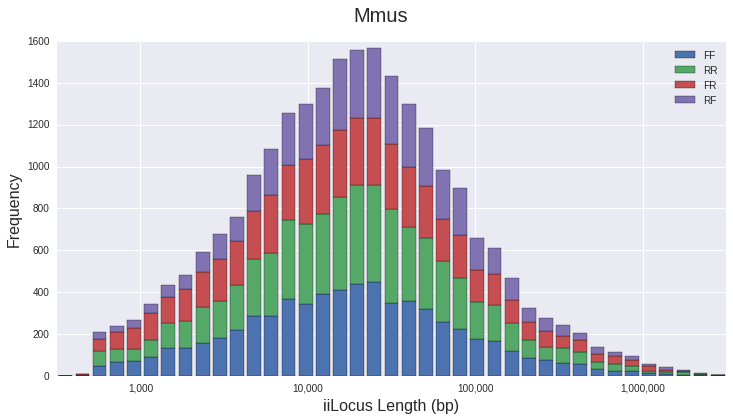

('Hsap', 'FF', '97 / 336', '0.2887')
('Hsap', 'RR', '86 / 336', '0.2560')
('Hsap', 'FR', '88 / 336', '0.2619')
('Hsap', 'RF', '65 / 336', '0.1935')


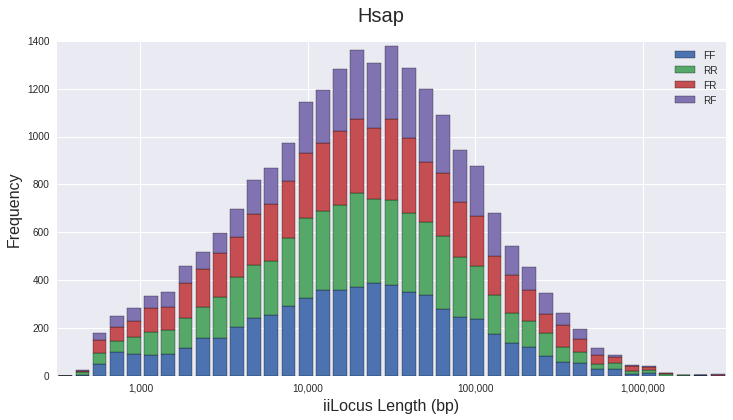

In [13]:
orientations = ['FF', 'RR', 'FR', 'RF']
for species in ['Scer', 'Cele', 'Crei', 'Mtru', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']:
    datafile = 'species/{}/{}.iloci.tsv'.format(species, species)
    shuffile = 'species/{}/{}.iloci.shuffled.tsv'.format(species, species)
    data = pandas.read_table(datafile)
    data['LogLength'] = numpy.log10(data['Length'])
    shufdata = pandas.read_table(shuffile)
    shufdata['LogLength'] = numpy.log10(shufdata['Length'])
    
    iiloci = data.loc[data.LocusClass == 'iiLocus']
    short = iiloci.loc[iiloci.Length < 750]
    shufiiloci = shufdata.loc[shufdata.LocusClass == 'iiLocus']
    #print(shufiiloci.head())
    subsets = list()
    shufsubsets = list()
    for orient in orientations:
        # subset = iiloci.loc[(iiloci.FlankGeneOrient == orient) & (iiloci.Length > 10000)]
        subset = iiloci.loc[(iiloci.FlankGeneOrient == orient)]
        subsets.append(subset['LogLength'])
        shortsubset = short.loc[short.FlankGeneOrient == orient]
        print(species, orient, '{} / {}'.format(len(shortsubset), len(short)), '{:.4f}'.format(len(shortsubset) / len(short)))
        shufsubset = shufiiloci.loc[(shufiiloci.FlankGeneOrient == orient)]
        shufsubsets.append(shufsubset['LogLength'])

    fig, axis = plt.subplots()
    #_ = plt.subplot(121)
    _ = plt.hist(subsets, stacked=True, bins=numpy.log10(numpy.logspace(2.5, 6.5, 40)), label=orientations)
    #_ = plt.title('Observed')
    _ = plt.legend()
    #_ = plt.subplot(122)
    #_ = plt.hist(shufsubsets, stacked=True, bins=20, label=orientations)
    #_ = plt.title('Shuffled')
    #_ = plt.legend()
    _ = axis.set_xlabel('iiLocus Length (bp)', fontsize=16)
    _ = axis.set_ylabel('Frequency', fontsize=16)
    _ = axis.set_xlim((2.5, 6.5))
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])
    _ = plt.suptitle(species, fontsize=20)
    _ = plt.show()

In [7]:
numpy.logspace(2.5, 6.5, 25)

array([  3.16227766e+02,   4.64158883e+02,   6.81292069e+02,
         1.00000000e+03,   1.46779927e+03,   2.15443469e+03,
         3.16227766e+03,   4.64158883e+03,   6.81292069e+03,
         1.00000000e+04,   1.46779927e+04,   2.15443469e+04,
         3.16227766e+04,   4.64158883e+04,   6.81292069e+04,
         1.00000000e+05,   1.46779927e+05,   2.15443469e+05,
         3.16227766e+05,   4.64158883e+05,   6.81292069e+05,
         1.00000000e+06,   1.46779927e+06,   2.15443469e+06,
         3.16227766e+06])